## 第12章 机器学习基础
本章先介绍机器学习中常用的监督学习、无监督学习等，然后介绍神经网络及相关算法，最后介绍传统机器学习中的一些不足及优化方法等.这里从12.5节开始，之前的章节基本是描述性的内容，大家可参考书中对应章节。
### 12.5 实例1：机器学习如何学习的？
这是一个简单的回归实例，希望通过这个简单实例，帮助大家更好地了解机器学习是如何学习的、学习的目标是什么、学习的内容是什么、学习内容存放在哪里等问题。

### 12.5.1 实例概述
这里使用的数据集是房屋面积与房价，共有44条记录，以这些数据为依据，设计一个模型。根据这些数据的分布情况，假设模型为一条直线：y=kx+b。模型明确后，定义学习目标，即损失函数，然后，利用梯度下降方法，通过多次迭代运算，最后求出使损失函数的值最小化的参数k和b，参数k和b就是要学习的内容，这些内容一旦确定，模型也就确定了。利用迭代法求损失函数最小值的过程，如下图所示。
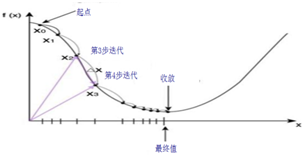

#### 12.5.2 查看数据分布情况

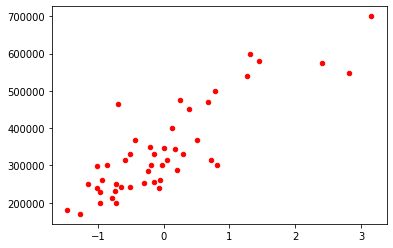

In [2]:
%matplotlib inline
#导入需要的库
import numpy as np
import matplotlib.pyplot as plt
# 定义存储输入数据、目标数据的数组
x, y = [], []
#遍历数据集，变量row对应每个样本
for row in open(r".\data\prices.txt", "r"):
    x1, y1 = row.split(",")
    x.append(float(x1))
    y.append(float(y1))
#把读取后的数据转换为numpy数组    
x, y = np.array(x), np.array(y)
# 对x数据进行标准化处理
x = (x - x.mean()) / x.std()
# 可视化原数据
plt.figure()
#c设置点的颜色，s设置点的大小
plt.scatter(x, y, c="r", s=20)
plt.show()


#### 12.5.3 利用迭代方法求出参数
把求模型参数转换为求损失函数最小值，这里采用梯度下降方法求损失函数的最小值，通过求损失函数的最小值来得到k和b。

In [5]:
# 随机初始化参数
k = np.random.rand(1,1)
b = np.random.rand(1,1)

lr =0.01 # 学习率
#利用迭代方法求参数k和b
for i in range(100):
    # 前向传播
    y_pred = x*k + b
    # 定义损失函数
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    #计算梯度
    grad_w=np.sum((y_pred - y)*x)
    grad_b=np.sum((y_pred - y))
    #使用梯度下降法，是loss最小
    k -= lr * grad_w
    b -= lr * grad_b

#### 12.5.4 可视化模型
求得参数k、b后，为更直观查看模型与样本的拟合程度，把模型可视化

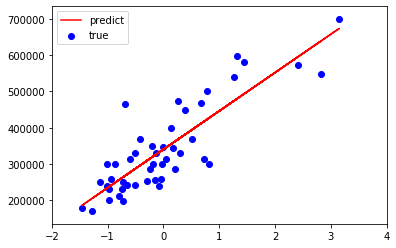

[[105764.13349282]] [[340412.65957447]]


In [6]:
plt.plot(x, y_pred[0],'r-',label='predict')
plt.scatter(x, y,color='blue',marker='o',label='true') # true data
plt.xlim(-2,4)
#plt.ylim(2,6)  
plt.legend()
plt.show()
print(k,b)

### 12.6 实例2：用Scikit-learn实现电信客户流失预测
这节将用Scikit-learn工具实现一个机器学习任务的完整过程

#### 12.6.4 导入数据

这里我们以一个长期的电信客户数据作为数据集，数据很简单。 每行代表一个预订的电话用户。 每列包含客户属性，例如电话号码，在一天中不同时间使用的通话分钟，服务产生的费用，生命周期帐户持续时间等。具体包括20个字段或特征，一个标签字段，各字段的含义如下表。
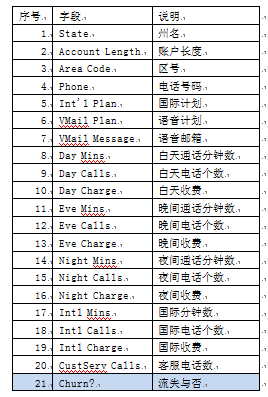
这是一个二分类问题，所有的数据中包括20个特征及1个标签， 标签值为False（在网）或True（流失）。

（1）导入需要的模块

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
#修改图形的字符集，以支持中文
plt.rcParams['font.sans-serif']=['SimHei']  
#防止坐标轴上的负号变为方块
plt.rcParams['axes.unicode_minus']=False  

#代入数据预处理、算法等模块
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
%matplotlib inline


（2）导入数据

In [3]:
churn_df = pd.read_csv(r'.\data\churn.csv')
col_names = churn_df.columns.tolist()

（3）查看数据集的基本信息

In [4]:
print("显示各列的名称")
print(col_names)  #显示各列的名称
#查看churn_df的数据类型
print("查看churn_df的数据类型")
print(type(churn_df))
#查看数据集的形状
print("查看数据集的形状")
print(churn_df.shape)
#查看数据前3行样本
print("查看数据前3行样本")
print(churn_df.head(3))
#查看各列的数据类型
print("查看各列的数据类型")
print(churn_df.info())


显示各列的名称
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']
查看churn_df的数据类型
<class 'pandas.core.frame.DataFrame'>
查看数据集的形状
(3333, 21)
查看数据前3行样本
  State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   

   Night Mins 

#### 12.6.5 探索数据
（1）查看数据集的统计信息

In [5]:
#查看数据集的统计信息
print(churn_df.describe())

       Account Length    Area Code  VMail Message     Day Mins    Day Calls  \
count     3333.000000  3333.000000    3333.000000  3333.000000  3333.000000   
mean       101.064806   437.182418       8.099010   179.775098   100.435644   
std         39.822106    42.371290      13.688365    54.467389    20.069084   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        101.000000   415.000000       0.000000   179.400000   101.000000   
75%        127.000000   510.000000      20.000000   216.400000   114.000000   
max        243.000000   510.000000      51.000000   350.800000   165.000000   

        Day Charge     Eve Mins    Eve Calls   Eve Charge   Night Mins  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean     30.562307   200.980348   100.114311    17.083540   200.872037   
std       9.259435    50.713844    19.922625     4.310668    50.57

（2）查看各州与客户流失的统计信息

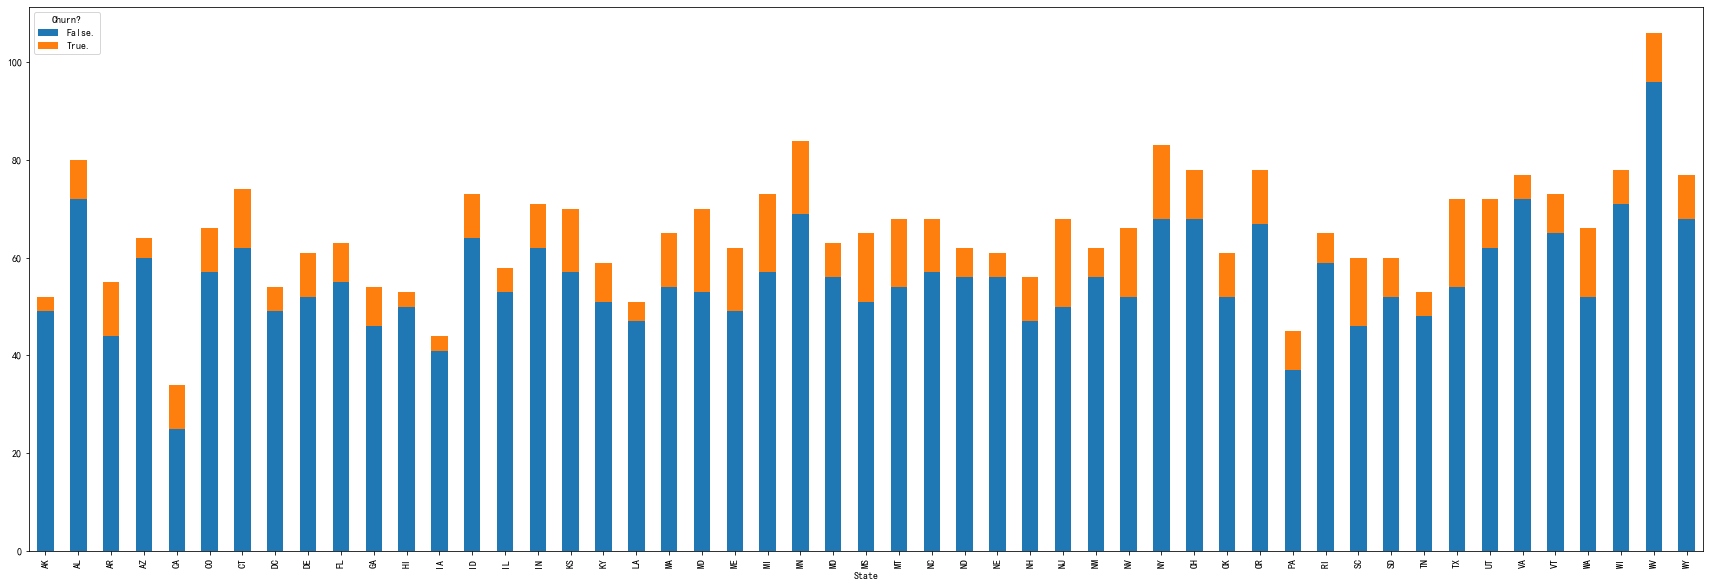

In [6]:
#查看各州客户流失信息
churn_df.groupby(["State", "Churn?"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))


（3）查看一个特征的分布

Text(0.5, 1.0, '白天通话时间的分布')

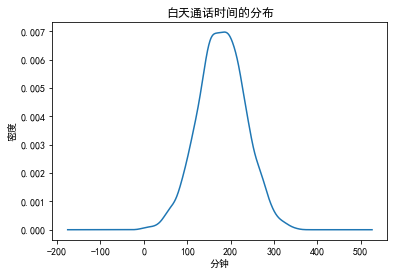

In [7]:
#查看重要特征的分布信息
churn_df['Day Mins'].plot(kind='kde')    # plots a kernel desnsity estimate of customer 
plt.xlabel("分钟")# plots an axis lable
plt.ylabel("密度") 
plt.title("白天通话时间的分布")

从上图 可以看出，客户白天打电话的时间分布接近正态分布，说明这数据符合人民的预期。

（4）查看客户服务电话与客户流失的关系

Text(0, 0.5, '用户数量')

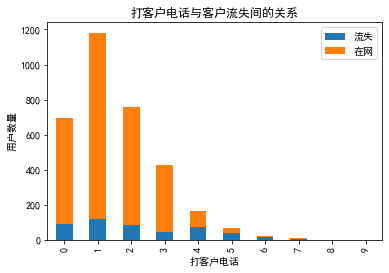

In [8]:
#查看客户服务电话和结果的关联
cus_0 = churn_df['CustServ Calls'][churn_df['Churn?'] == 'False.'].value_counts()
cus_1 = churn_df['CustServ Calls'][churn_df['Churn?'] == 'True.'].value_counts()
df=pd.DataFrame({'流失':cus_1, '在网':cus_0})
df.plot(kind='bar', stacked=True)
plt.title("打客户电话与客户流失间的关系")
plt.xlabel("打客户电话") 
plt.ylabel("用户数量")

从上图可以看出， 打客户电话的多少和最终的分类是强相关的， 打电话3次以上的流失率比例急速升高，说明这是一个非常关键的指标。

#### 12.6.6 数据预处理
删除不相关的列，并将字符串转换为布尔值，对一些比较大的数据进行规范化。  
（1）数据类型转换  
将标签列" Churn?"转换为为0，1形式，即把False转换为0，把True转换为1。

In [9]:
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)
#查看前16个数据
y[:16]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

（2）删除一些不必要的特征或列  
根据对问题的分析， 我们做第一件事情， 去除一些无关列，如：州名、电话、区号

In [10]:
fields_drop = ['State','Area Code','Phone','Churn?']
churn_feats = churn_df.drop(fields_drop,axis=1)

（3）把yes或no转换为1或0  
对于有些特征， 本身不是数值类型的， 这些数据是不能被算法直接使用的， 所以我们来处理一下。将属性值yes，no等转化为boolean values，即False或True。对False或True进行类型转换时，numpy将自动把False转换为0，True转换为1。

In [16]:
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feats[yes_no_cols] = churn_feats[yes_no_cols] == 'yes'

#获取各特征的名称
features = churn_feats.columns
#把数据转化为float类型
#X = churn_feats.as_matrix().astype(np.float)
X = churn_feats.values.astype(np.float)

（4）规范化数据  
规范化的公式为：(X-mean)/std ，计算时对每个属性/每列分别进行。
将数据按期属性（按列进行）减去其均值，并处以其方差。得到的结果是，对于每个属性/每列来说所有数据都聚集在-1到1附近，方差为1。这里直接使用sklearn库中数据预处理模块：StandardScaler


In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### 12.6.7 选择模型
为便于比较，这里使用多种模型。

（1）导入模型

In [24]:
#导入模型
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### 12.6.8 评估模型

In [25]:
#取消一些警告信息
import warnings
warnings.filterwarnings("ignore")

In [26]:
# 使用多种模型
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='scale')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GBC', GradientBoostingClassifier(n_estimators=100)))
#评估模型
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=5, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.86 (0.0170)
LDA: 0.85 (0.0181)
KNN: 0.89 (0.0144)
CART: 0.87 (0.0100)
SVM: 0.91 (0.0097)
RF: 0.92 (0.0080)
GBC: 0.91 (0.0092)


从以上结果不难看出，使用集成方法效果较好，SVM、CART效果也不错。